In [ ]:
%matplotlib inline

import PIL
import numpy as np
import pylab as plt
from os import mkdir
import tensorflow as tf
from imageio import imread
from io import BytesIO as sio

In [6]:
# tf.reset_default_graph()

initzer = tf.contrib.layers.xavier_initializer()

# x = tf.layers.conv2d(x_in,filters=12,
#                     kernel_size=5,
#                     padding='SAME',
#                     kernel_initializer=initzer,
#                     kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
#                     bias_initializer=tf.constant_initializer(0.1),
#                     name='conv_1')
# x = tf.layers.batch_normalization(x,name='norm_1')
# x = tf.nn.relu(x,name='act_1')


# model = ng.Model(data_provider,restore=False,model_add='./model',arch=architecture)
# print('# of variables:',model.n_variables)

def covd2(x,filters,name):
    x = tf.layers.conv2d(x,filters=filters,
                    kernel_size=5,
                    padding='SAME',
                    kernel_initializer=initzer,
                    kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                    bias_initializer=tf.constant_initializer(0.1),
                    name='conv_'+name)
    x = tf.layers.batch_normalization(x,name='norm_'+name)
    x = tf.nn.relu(x,name='act_'+name)
    return x

In [29]:
lx = 20
def data_provider(n):
    imgs = []
    truth = []
    for _ in range(n):
        image = np.zeros((lx,lx))
        nobject = np.random.randint(3,15)
        pnts = np.random.randint(0,lx**2,nobject)
        pp = []
        for i in range(nobject):
            image[pnts[i]%lx,pnts[i]//lx] = 1
            pp.append([pnts[i]%lx,pnts[i]//lx])
        imgs.append(image)
        truth.append(len(pp))

    imgs = np.array(imgs)
    truth = np.array(truth)
    return np.expand_dims(imgs,-1),truth

13


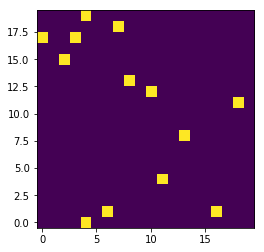

In [31]:
x,y = data_provider(1)
plt.imshow(x[0,:,:,0],origin='lower')
print(y[0])

In [10]:
tf.reset_default_graph()

sess = tf.InteractiveSession()
x_in = tf.placeholder(tf.float32,(None,20,20,1))
y_in = tf.placeholder(tf.float32,(None))
learning_rate = tf.placeholder(tf.float32)

print(x_in)
x = tf.layers.conv2d(x_in,filters=16,kernel_size=(5,5),strides=(2,2))
x = tf.layers.batch_normalization(x)
x = tf.nn.relu(x)
print(x)
# x = tf.layers.max_pooling2d(x,pool_size=4,strides=(2,2))
# print(x)
x = tf.layers.conv2d(x,filters=4,kernel_size=(5,5),strides=(2,2))
x = tf.layers.batch_normalization(x)
x = tf.nn.relu(x)
print(x)
# x = tf.layers.max_pooling2d(x,pool_size=4,strides=(2,2))
# print(x)
x = tf.layers.flatten(x)
print(x)
x = tf.layers.dense(x,20)
x = tf.nn.relu(x)
print(x)
x = tf.layers.dropout(x,rate=0.0,training=1)
x = tf.layers.dense(x,5)
x = tf.nn.relu(x)
print(x)
x_out = tf.layers.dense(x,1)
print(x_out)

loss = tf.reduce_mean(tf.pow(x_out-y_in,2))

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
# in_shape = tf.shape(x_in)
# grd = tf.range(in_shape[1], in_shape[2])
# GX, GY = tf.meshgrid(grd,grd)
# print(GX, GY)
# x = covd2(x_in,12,'1')
# print(x)
# x = covd2(x,12,'2')
# print(x)
# x = covd2(x,1,'3')
# print(x)

saver = tf.train.Saver()

init = tf.global_variables_initializer()
sess.run(init)

# saver.restore(sess, "./model/model.ckpt")


/home/gf/packages/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Placeholder:0", shape=(?, 20, 20, 1), dtype=float32)
Tensor("Relu:0", shape=(?, 8, 8, 16), dtype=float32)
Tensor("Relu_1:0", shape=(?, 2, 2, 4), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 16), dtype=float32)
Tensor("Relu_2:0", shape=(?, 20), dtype=float32)
Tensor("Relu_3:0", shape=(?, 5), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 1), dtype=float32)


In [63]:
for iii in range(6000):
    imgs,gts = data_provider(200)
    _,cc = sess.run([optimizer,loss],feed_dict={learning_rate:0.0001,x_in:imgs,y_in:gts})
    if iii%10000==0:
        print(cc)

12.260472


13 [[8.3045]]


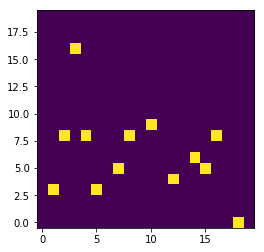

In [62]:
imgs,gts = data_provider(1)
pred = sess.run(x_out,
                feed_dict={learning_rate:0.01,x_in:imgs,y_in:gts})
                
img,y = imgs[0,:,:,0],gts[0]
plt.imshow(img,origin='lower')
print(y,pred)

In [1]:
def add_marker(ax,mx,my,marker,n,markersize=70):
    x = np.random.uniform(10,mx-10,n).astype(int)
    y = np.random.uniform(10,my-10,n).astype(int)
    ax.plot(x,y,ls='',marker=marker,
            markersize=markersize,
            markerfacecolor='gray',
            markeredgecolor='gray')
    return x,y

def make_image(lx = 5,ly = 5,dpi = 40):
    fig,ax = plt.subplots(1,1,figsize=(lx,ly))
    num = np.random.randint(7)
    x,y = add_marker(ax,dpi*lx,dpi*ly,'*',num)
    add_marker(ax,dpi*lx,dpi*ly,'.',2)
    ax.set_xlim(0,dpi*lx)
    ax.set_ylim(0,dpi*ly)
    plt.subplots_adjust(0,0,1,1)
#     plt.savefig('./datasets/locator/'+str(i)+'.png',dpi=40)
    buffer_ = sio()
    plt.savefig(buffer_,format = "png",dpi=dpi)
#     plt.savefig( buffer_, format = "png", bbox_inches = 'tight', pad_inches = 0 )
    buffer_.seek(0)
    image = PIL.Image.open( buffer_ )
    image = np.asarray(image)
    image = np.mean(image,axis=-1)
    image = np.rot90(image.T,1)
    
    buffer_.close()
    plt.close()
    return image,[x,y]

def data_provider(n):
    imgs = []
    truth = []
    for _ in range(n):
        image,gt = make_image()
        imgs.append(image)
        truth.append(gt)

    imgs = np.array(imgs)
    truth = np.array(truth)
    return np.expand_dims(imgs,-1),truth

/home/gf/packages/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(5, 200, 200, 1) (5, 2)


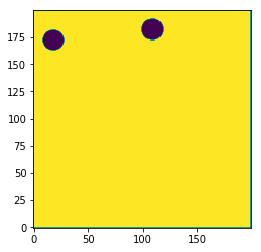

In [2]:
i = np.random.randint(5)
imgs,gts = data_provider(5)
print(imgs.shape,gts.shape)
img,[x,y] = imgs[i,:,:,0],gts[i]
plt.imshow(img,origin='lower')
plt.plot(x,y,'ro');

In [3]:
# tf.reset_default_graph()

initzer = tf.contrib.layers.xavier_initializer()

# x = tf.layers.conv2d(x_in,filters=12,
#                     kernel_size=5,
#                     padding='SAME',
#                     kernel_initializer=initzer,
#                     kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
#                     bias_initializer=tf.constant_initializer(0.1),
#                     name='conv_1')
# x = tf.layers.batch_normalization(x,name='norm_1')
# x = tf.nn.relu(x,name='act_1')


# model = ng.Model(data_provider,restore=False,model_add='./model',arch=architecture)
# print('# of variables:',model.n_variables)

def covd2(x,filters,name):
    x = tf.layers.conv2d(x,filters=filters,
                    kernel_size=5,
                    padding='SAME',
                    kernel_initializer=initzer,
                    kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                    bias_initializer=tf.constant_initializer(0.1),
                    name='conv_'+name)
    x = tf.layers.batch_normalization(x,name='norm_'+name)
    x = tf.nn.relu(x,name='act_'+name)
    return x

In [13]:
tf.reset_default_graph()

sess = tf.InteractiveSession()
x_in = tf.placeholder(tf.float32,(None,200,200,1))
y_in = tf.placeholder(tf.float32,(None))
learning_rate = tf.placeholder(tf.float32)

print(x_in)
x = tf.layers.conv2d(x_in,filters=16,kernel_size=(5,5),strides=(2,2))
x = tf.layers.batch_normalization(x)
x = tf.nn.relu(x)
print(x)
x = tf.layers.max_pooling2d(x,pool_size=4,strides=(2,2))
print(x)
x = tf.layers.conv2d(x,filters=4,kernel_size=(5,5),strides=(2,2))
x = tf.layers.batch_normalization(x)
x = tf.nn.relu(x)
print(x)
x = tf.layers.max_pooling2d(x,pool_size=4,strides=(2,2))
print(x)
x = tf.layers.flatten(x)
print(x)
x = tf.layers.dense(x,200)
x = tf.nn.relu(x)
print(x)
x = tf.layers.dropout(x,rate=0.0,training=1)
x = tf.layers.dense(x,10)
x = tf.nn.relu(x)
print(x)
x_out = tf.layers.dense(x,1)
print(x_out)

loss = tf.reduce_mean(tf.pow(x_out-y_in,2))

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
# in_shape = tf.shape(x_in)
# grd = tf.range(in_shape[1], in_shape[2])
# GX, GY = tf.meshgrid(grd,grd)
# print(GX, GY)
# x = covd2(x_in,12,'1')
# print(x)
# x = covd2(x,12,'2')
# print(x)
# x = covd2(x,1,'3')
# print(x)

saver = tf.train.Saver()

init = tf.global_variables_initializer()
sess.run(init)

# saver.restore(sess, "./model/model.ckpt")


/home/gf/packages/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Placeholder:0", shape=(?, 200, 200, 1), dtype=float32)
Tensor("Relu:0", shape=(?, 98, 98, 16), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 48, 48, 16), dtype=float32)
Tensor("Relu_1:0", shape=(?, 22, 22, 4), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 10, 10, 4), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 400), dtype=float32)
Tensor("Relu_2:0", shape=(?, 200), dtype=float32)
Tensor("Relu_3:0", shape=(?, 10), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 1), dtype=float32)


In [14]:
for iii in range(300):
    imgs,gts = data_provider(3)
    yy = [len(i[0]) for i in gts]
    _,cc = sess.run([optimizer,loss],feed_dict={learning_rate:0.001,x_in:imgs,y_in:yy})
    if iii%50==0:
        print(cc)

1634.5211
5.1758475
13.015453
5.2522874
4.2463245
3.7587688


In [10]:
saver.save(sess, "./model/model.ckpt")

'./model/model.ckpt'

[[2.9848566]]


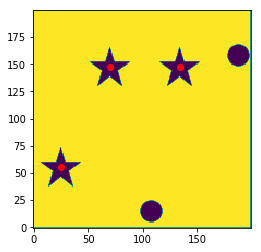

In [12]:
imgs,gts = data_provider(1)
yy = [len(i[0]) for i in gts]
pred = sess.run(x_out,
                feed_dict={learning_rate:0.01,x_in:imgs,y_in:yy})
                
img,[x,y] = imgs[0,:,:,0],gts[0]
plt.imshow(img,origin='lower')
plt.plot(x,y,'ro');
print(pred)